In [39]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import sklearn.metrics as metrics

In [3]:
#Load, train/test split and reshape MNIST data
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
#Normalize
x_train = tf.keras.utils.normalize(x_train, axis=1)  
x_test = tf.keras.utils.normalize(x_test, axis=1) 

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
#Model
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='tanh', input_shape=(28,28,1)))
model.add(AveragePooling2D())
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='tanh'))
model.add(AveragePooling2D())
model.add(Flatten())
model.add(Dense(units=128, activation='tanh'))
model.add(Dense(units=10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d (AveragePo (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               51328     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

2021-09-29 14:52:28.208106: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# Compile and fit model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, 
          validation_data=(x_test, y_test))

2021-09-29 14:53:37.223681: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2980 - accuracy: 0.9102 - val_loss: 0.1383 - val_accuracy: 0.9586
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1211 - accuracy: 0.9639 - val_loss: 0.0932 - val_accuracy: 0.9713
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0813 - accuracy: 0.9755 - val_loss: 0.0771 - val_accuracy: 0.9758
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0621 - accuracy: 0.9818 - val_loss: 0.0658 - val_accuracy: 0.9794
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0491 - accuracy: 0.9851 - val_loss: 0.0533 - val_accuracy: 0.9823
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0397 - accuracy: 0.9881 - val_loss: 0.0548 - val_accuracy: 0.9830
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0330 - accuracy: 0.9901 - val_loss: 0.0473 - val_accuracy:

7


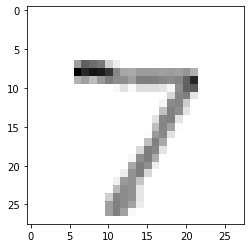

In [11]:
#Prediction and output
predictions = model.predict(x_test)
print(np.argmax(predictions[0]))
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

In [43]:
#convert predictions to the actual digit predicted
num_predictions = [None] * len(predictions)
for x in range(len(predictions)):
    #print(np.argmax(predictions[x]))
    num_predictions[x] = np.argmax(predictions[x])
print(len(num_predictions))

10000


In [44]:
#Metrics to evaluate model
print(classification_report(y_test, num_predictions))
print(confusion_matrix(y_test, num_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 971    0    2    0    0    0    4    1    2    0]
 [   0 1127    3    1    0    0    1    1    2    0]
 [   1    1 1027    0    1    0    0    1    1    0]
 [   0    0    5  996    0    4    0    4    1    0]
 [   0    1    0    0  970   

In [45]:
metrics.f1_score(y_test, num_predictions, average='weighted')

0.9853933400465401